# Project: Systemic And Banking Crisis.

> ### **Title**: Training of Model.

## Table of Contents:
<ul>
<li><a href="#pv">Processing and processing of variables for the model.</a></li>
<li><a href="#bc">train of Model.</a></li>
<li><a href="#sc">save.</a></li>
<li><a href="#app">App.</a></li>
</ul>

In [76]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize': [17,7]}, font_scale=1.2)

from sklearn.metrics import accuracy_score


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, 
                              GradientBoostingRegressor, BaggingRegressor, 
                              ExtraTreesRegressor)
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_error, r2_score




In [78]:
# Create dictionary of regression models
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'BayesianRidge': BayesianRidge(),
    'HuberRegressor': HuberRegressor(max_iter= 5000),
    'KNN': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor(n_estimators=30),
    'XGBRF': XGBRFRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'Bagging': BaggingRegressor(),
    'ExtraTrees': ExtraTreesRegressor()
}



In [79]:
df = pd.read_csv("../03-Dataset/03-Data_Clean_2015.csv")
print(df.shape)
display(df.head())

(195, 19)


,WEO_Country_Code,Country,Advanced_Country,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PCPIPCH,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH
0,111,United States,1,-2.233,31.501,-3.334,104.661,35.031,5.275,2.946,19.611,21.415,0.121,1.000,57006.926,16.266,5.191,1.69,0.320
1,112,United Kingdom,1,-4.948,35.805,-3.416,87.867,40.427,5.425,2.223,12.876,17.824,0.040,0.677,43453.689,2.515,4.955,2.02,3.771
2,122,Austria,1,1.725,50.122,0.044,84.894,51.131,6.158,1.015,25.531,23.806,0.810,0.774,51533.260,0.395,3.630,2.02,3.049
3,124,Belgium,1,1.383,51.306,-2.493,105.230,53.720,8.650,2.041,25.011,23.628,0.623,0.768,48286.997,0.482,1.036,2.02,1.283
4,128,Denmark,1,7.957,53.523,0.724,39.894,54.418,4.542,2.101,28.500,20.544,0.226,6.955,51577.438,0.260,4.063,2.02,3.232


<a id='pv'></a>
### Processing and processing of variables for the model.

In [80]:
df["USA"]=0
df["USA"]=df["USA"].where(df["Country"]!="United States",1)

In [81]:
df.drop(["WEO_Country_Code","Country"],axis=1,inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Advanced_Country  195 non-null    int64  
 1   BCA_NGDPD         195 non-null    float64
 2   GGR_NGDP          195 non-null    float64
 3   GGSB_NPGDP        195 non-null    float64
 4   GGXWDG_NGDP       195 non-null    float64
 5   GGX_NGDP          195 non-null    float64
 6   LUR               195 non-null    float64
 7   NGDP_RPCH         195 non-null    float64
 8   NGSD_NGDP         195 non-null    float64
 9   NID_NGDP          195 non-null    float64
 10  PCPIPCH           195 non-null    float64
 11  PPPEX             195 non-null    float64
 12  PPPPC             195 non-null    float64
 13  PPPSH             195 non-null    float64
 14  TM_RPCH           195 non-null    float64
 15  TRWMA             195 non-null    float64
 16  TX_RPCH           195 non-null    float64
 1

In [83]:
# df=pd.get_dummies(df,columns=['Level_Country'])

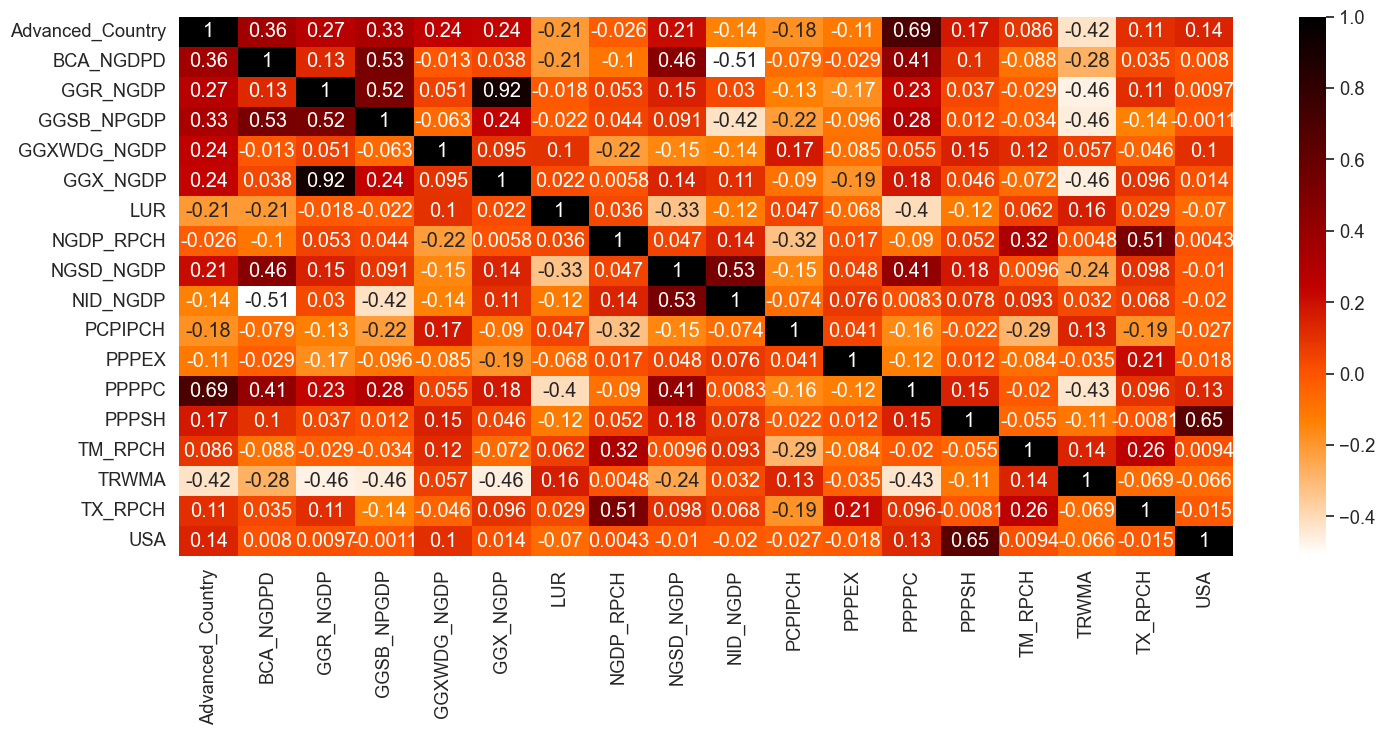

In [84]:
sns.heatmap(df.corr() ,annot=True ,cmap="gist_heat_r");

In [ ]:
# from sklearn.preprocessing import StandardScaler  # dist ~ (0 , 1) |  # MinMaxScaler   # value to [0, 1]
# scaler=StandardScaler()

from sklearn.preprocessing import RobustScaler # for Outliers   

# Specify the columns you want to scale (exclude binary columns)
columns_to_scale = df.drop(columns=["Advanced_Country", "USA"]).columns

# Create a copy of the data
df_scaled = df.copy()

# Implement RobustScaler
scaler = RobustScaler()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display some values ​
df_scaled.head()

,Advanced_Country,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PCPIPCH,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH,USA
0,1,0.059301,0.347677,-0.013448,1.706125,0.244396,-1.024924,0.000000,-0.105582,-0.200316,-0.305847,-0.045198,1.938708,50.120743,0.098888,-0.515443,-0.299649,1
1,1,-0.227182,0.601735,-0.033444,1.229787,0.537648,-0.995771,-0.224360,-0.718825,-0.555193,-0.323196,-0.048376,1.351754,7.547988,0.075759,-0.453364,0.090868,0
2,1,0.476944,1.446845,0.810265,1.145463,1.119372,-0.853311,-0.599224,0.433452,0.035972,-0.158278,-0.047421,1.701658,0.984520,-0.054099,-0.453364,0.009166,0
3,1,0.440857,1.516735,0.191627,1.722264,1.260074,-0.368985,-0.280838,0.386105,0.018381,-0.198329,-0.047480,1.561071,1.253870,-0.308327,-0.453364,-0.190676,0
4,1,1.134536,1.647600,0.976081,-0.130898,1.298008,-1.167384,-0.262219,0.703789,-0.286392,-0.283358,0.013390,1.703571,0.566563,-0.011663,-0.453364,0.029874,0


In [86]:
x=df_scaled.drop(columns=["PCPIPCH"])
y=df_scaled[["PCPIPCH"]]

In [87]:
x

,Advanced_Country,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH,USA
0,1,0.059301,0.347677,-0.013448,1.706125,0.244396,-1.024924,0.000000,-0.105582,-0.200316,-0.045198,1.938708,50.120743,0.098888,-0.515443,-0.299649,1
1,1,-0.227182,0.601735,-0.033444,1.229787,0.537648,-0.995771,-0.224360,-0.718825,-0.555193,-0.048376,1.351754,7.547988,0.075759,-0.453364,0.090868,0
2,1,0.476944,1.446845,0.810265,1.145463,1.119372,-0.853311,-0.599224,0.433452,0.035972,-0.047421,1.701658,0.984520,-0.054099,-0.453364,0.009166,0
3,1,0.440857,1.516735,0.191627,1.722264,1.260074,-0.368985,-0.280838,0.386105,0.018381,-0.047480,1.561071,1.253870,-0.308327,-0.453364,-0.190676,0
4,1,1.134536,1.647600,0.976081,-0.130898,1.298008,-1.167384,-0.262219,0.703789,-0.286392,0.013390,1.703571,0.566563,-0.011663,-0.453364,0.029874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,0.110056,0.185113,0.158643,-0.182434,0.091737,3.012744,0.282389,0.717629,0.683312,0.125263,0.160580,-0.154799,0.564809,0.172851,0.623288,0
191,0,-0.236362,0.996576,0.952672,0.052955,0.660580,3.333425,0.424515,-0.467155,-0.273347,-0.048366,-0.004989,-0.120743,-0.246093,-0.603858,0.767568,0
192,0,0.158594,0.798418,0.260148,0.193893,0.608842,-0.592685,0.445927,-0.098298,-0.242909,-0.037740,0.635354,2.575851,0.136817,-0.453364,0.409754,0
193,0,-0.629735,0.003424,0.338910,-0.881681,-0.149398,4.344057,0.921645,0.081896,0.690879,-0.051701,-0.121083,-0.191950,-0.698000,0.329665,-0.128437,0


In [88]:
y

,PCPIPCH
0,-0.305847
1,-0.323196
2,-0.158278
3,-0.198329
4,-0.283358
...,...
190,-0.396016
191,-0.550867
192,-0.529664
193,-0.444849


In [89]:
from sklearn.model_selection import train_test_split

# Split into 70% train and 30% temp (to later split into val and test)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# Split temp into 15% val and 15% test (50/50 of 30%)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(len(x_train), len(x_val), len(x_test))  # Expected: ~136, ~29, ~30


136 29 30


In [90]:
from sklearn.utils import resample

# Combine features and target for bootstrapping
train_data = pd.concat([x_train, y_train], axis=1)

# Bootstrap sampling to increase size to 300
bootstrapped_data = resample(train_data, replace=True, n_samples=1000, random_state=42)

# Separate features and target again
x_train_boot = bootstrapped_data.drop(columns=["PCPIPCH"])
y_train_boot = bootstrapped_data[["PCPIPCH"]]

# Optional: print new sizes
print("Original training size:", len(x_train))
print("Bootstrapped training size:", len(x_train_boot))


Original training size: 136
Bootstrapped training size: 1000


In [96]:
val_results = []

# Train on train set, evaluate on train and val sets
for name, model in models.items():
    print(f'\n----------------')
    print(f'{name}:')
    
    model.fit(x_train_boot, y_train_boot.values.ravel())  # Train the model

    # Evaluation on training set
    y_pred_tr = model.predict(x_train_boot)
    mse_tr = mean_squared_error(y_train_boot, y_pred_tr)
    r2_tr = r2_score(y_train_boot, y_pred_tr)
    print(f"{name} (train): R2={r2_tr:.4f}, MSE={mse_tr:.4f}")

    # Evaluation on validation set
    y_pred_v = model.predict(x_val)
    mse_v = mean_squared_error(y_val, y_pred_v)
    r2_v = r2_score(y_val, y_pred_v)
    print(f"{name} (val):   R2={r2_v:.4f}, MSE={mse_v:.4f}")

    val_results.append({'Model': name, 'train_R2': r2_tr, 'valid_R2': r2_v, 'train_MSE': mse_tr,'valid_MSE': mse_v})


----------------
LinearRegression:
LinearRegression (train): R2=0.3268, MSE=4.9110
LinearRegression (val):   R2=-1.7459, MSE=2.2097

----------------
Lasso:
Lasso (train): R2=0.0265, MSE=7.1018
Lasso (val):   R2=-0.0372, MSE=0.8347

----------------
Ridge:
Ridge (train): R2=0.3261, MSE=4.9156
Ridge (val):   R2=-1.7023, MSE=2.1746

----------------
ElasticNet:
ElasticNet (train): R2=0.1176, MSE=6.4368
ElasticNet (val):   R2=-0.0129, MSE=0.8151

----------------
BayesianRidge:
BayesianRidge (train): R2=0.3242, MSE=4.9296
BayesianRidge (val):   R2=-1.6816, MSE=2.1580

----------------
HuberRegressor:
HuberRegressor (train): R2=0.0912, MSE=6.6296
HuberRegressor (val):   R2=-0.0321, MSE=0.8306

----------------
KNN:
KNN (train): R2=0.9997, MSE=0.0023
KNN (val):   R2=-0.5433, MSE=1.2420

----------------
DecisionTree:
DecisionTree (train): R2=1.0000, MSE=0.0000
DecisionTree (val):   R2=-0.3024, MSE=1.0481

----------------
SVR:
SVR (train): R2=0.1196, MSE=6.4220
SVR (val):   R2=-0.0567, MSE

In [97]:
# Convert validation results to DataFrame and sort
results_df = pd.DataFrame(val_results)
results_df = results_df.sort_values(by='valid_R2', ascending=False)
print('\nValidation Results (sorted by valid_R2):')
print(results_df)



Validation Results (sorted by valid_R2):
               Model  train_R2  valid_R2     train_MSE  valid_MSE
12  GradientBoosting  0.997482  0.237633  1.837178e-02   0.613501
9       RandomForest  0.999354  0.220232  4.709606e-03   0.627505
10             XGBRF  0.980204  0.184246  1.444097e-01   0.656464
13           Bagging  0.999997  0.134982  1.962133e-05   0.696108
11          AdaBoost  0.928560  0.073971  5.211344e-01   0.745205
3         ElasticNet  0.117618 -0.012896  6.436767e+00   0.815110
5     HuberRegressor  0.091176 -0.032101  6.629649e+00   0.830565
1              Lasso  0.026458 -0.037208  7.101753e+00   0.834675
8                SVR  0.119648 -0.056685  6.421957e+00   0.850349
14        ExtraTrees  1.000000 -0.188693  4.796716e-30   0.956580
7       DecisionTree  1.000000 -0.302449  1.304790e-31   1.048123
6                KNN  0.999690 -0.543328  2.260307e-03   1.241966
4      BayesianRidge  0.324232 -1.681579  4.929563e+00   2.157954
2              Ridge  0.326147 -1.

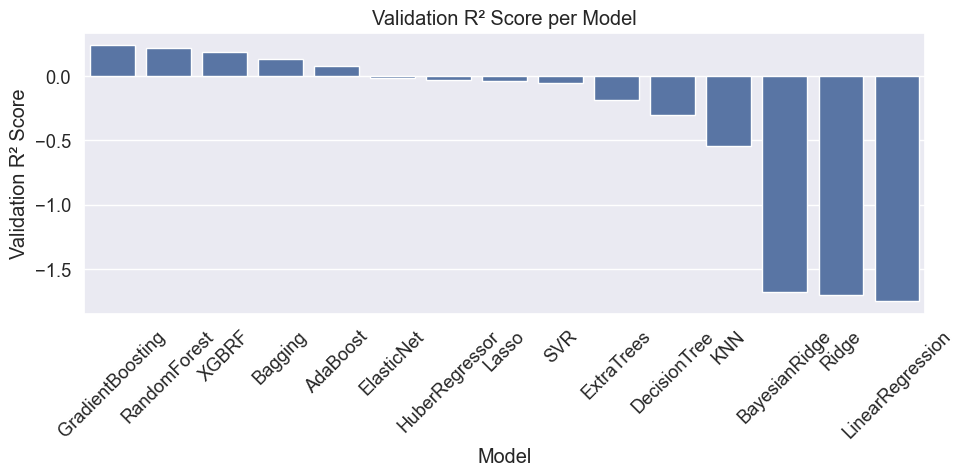

In [98]:
# Plot barplot for validation R2 scores
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Model', y='valid_R2')  # Updated to 'valid_R2'
plt.title('Validation R² Score per Model')
plt.ylabel('Validation R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


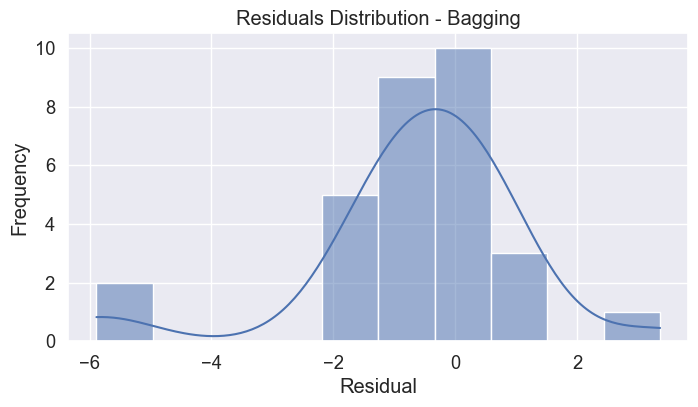

In [99]:
# Example: Residuals for the best model (e.g., Bagging)
best_model = models['Bagging']
y_pred = best_model.predict(x_test)
residuals = y_test.values.ravel() - y_pred

plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution - Bagging")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


In [100]:

# Get best model based on validation R2
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest model on validation set: {best_model_name}")

# Use pandas.concat instead of numpy to retain feature names
x_train_val = pd.concat([x_train, x_val])
y_train_val = pd.concat([y_train, y_val])

# Fit model on full training + validation set
best_model.fit(x_train_val, y_train_val.values.ravel())

# Final evaluation on test set
y_test_pred = best_model.predict(x_test)
final_mse = mean_squared_error(y_test, y_test_pred)
final_r2 = r2_score(y_test, y_test_pred)

print(f"\nFinal Evaluation on Test Set using {best_model_name}:")
print(f"R2={final_r2:.4f}, MSE={final_mse:.4f}")


Best model on validation set: GradientBoosting

Final Evaluation on Test Set using GradientBoosting:
R2=-0.1938, MSE=2.5976


In [74]:
df.describe()

,Advanced_Country,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PCPIPCH,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH,NaN_count,USA
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.00000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.205128,-3.429695,29.548532,-3.321388,52.190599,32.438607,10.252731,2.665095,21.12500,24.519172,4.118814,260.581708,19665.884534,0.527664,3.787056,5.466682,2.800087,1.805128,0.005128
std,0.404835,9.484156,17.620257,2.361777,36.021661,15.272505,5.444584,4.797415,9.35882,9.935084,10.728400,1040.056850,20579.607200,1.755512,11.903105,3.748691,10.804630,2.166515,0.071611
min,0.000000,-38.986000,2.064000,-11.613000,0.000000,1.822000,0.900000,-27.995000,-5.28800,-3.946000,-3.761000,0.180000,552.712000,0.001000,-34.846000,0.000000,-50.395000,0.000000,0.000000
25%,0.000000,-7.912500,18.745000,-4.702100,30.296000,22.272000,6.338625,1.326500,14.35100,18.657000,0.139500,1.023500,4475.011500,0.022500,-1.505500,2.020000,-2.623000,0.000000,0.000000
50%,0.000000,-2.802000,25.611000,-3.417350,44.389000,30.534000,9.089200,2.950000,21.42000,23.455000,1.485000,5.594000,12125.425000,0.077000,4.616000,4.450000,3.239000,1.000000,0.000000
75%,0.000000,1.313000,35.839000,-1.985050,67.903000,41.042500,12.860500,4.549000,27.10550,29.345500,4.808500,102.665500,27565.804500,0.345500,9.267000,8.113000,6.967050,2.000000,0.000000
max,1.000000,29.460000,133.466000,4.141000,271.409000,116.943000,32.900000,24.616000,45.66900,79.401000,121.738000,10853.547000,111437.514000,16.266000,48.758000,18.660000,45.813000,16.000000,1.000000


In [105]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.model_selection import train_test_split

# Assume df is a DataFrame with columns X and y.
X = df.drop(columns=['PPPPC'])
y = df['PPPPC']

# Add the constant to the model (intercept)
X_const = sm.add_constant(X)

# Run the model
model = sm.OLS(y, X_const).fit()

# Breusch-Pagan test
test = het_breuschpagan(model.resid, model.model.exog)
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(bp_labels, test)))

{'Lagrange multiplier statistic': 24.11533721537131, 'p-value': 0.11633490292799377, 'f-value': 1.4693139384071123, 'f p-value': 0.11057438332832854}


In [106]:
# Replace y with the transformed values
y_log = np.log1p(y) # log(1 + y) to avoid log(0)

# Retrain on y_log
model_log = sm.OLS(y_log, X_const).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  PPPPC   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     11.88
Date:                Thu, 22 May 2025   Prob (F-statistic):           2.17e-21
Time:                        20:20:50   Log-Likelihood:                -231.62
No. Observations:                 195   AIC:                             499.2
Df Residuals:                     177   BIC:                             558.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.5245      0.333  

In [107]:
from scipy.stats import boxcox

# Box-Cox يمكن تطبيقه فقط على بيانات موجبة تمامًا
y_boxcox, lambda_val = boxcox(y + 1)  # نضيف 1 لو فيه صفر

print("Lambda used:", lambda_val)


Lambda used: 0.11215937120383906


In [108]:
# اختبار Breusch-Pagan بعد التحويل
model_trans = sm.OLS(y_log, X_const).fit()
test = het_breuschpagan(model_trans.resid, model_trans.model.exog)
print(dict(zip(bp_labels, test)))


{'Lagrange multiplier statistic': 49.66939978582748, 'p-value': 4.753218617589105e-05, 'f-value': 3.558411668914359, 'f p-value': 9.312861449322752e-06}


In [109]:
# 1. تحضير البيانات
X = df.drop(columns=['PPPPC'])
y = df['PPPPC']
X_const = sm.add_constant(X)

# 2. النموذج الأصلي
model = sm.OLS(y, X_const).fit()
test = het_breuschpagan(model.resid, model.model.exog)
print("Before transformation:", dict(zip(bp_labels, test)))

# 3. تحويل y
y_log = np.log1p(y)

# 4. النموذج بعد التحويل
model_log = sm.OLS(y_log, X_const).fit()
test = het_breuschpagan(model_log.resid, model_log.model.exog)
print("After log transformation:", dict(zip(bp_labels, test)))


Before transformation: {'Lagrange multiplier statistic': 24.11533721537131, 'p-value': 0.11633490292799377, 'f-value': 1.4693139384071123, 'f p-value': 0.11057438332832854}
After log transformation: {'Lagrange multiplier statistic': 49.66939978582748, 'p-value': 4.753218617589105e-05, 'f-value': 3.558411668914359, 'f p-value': 9.312861449322752e-06}


In [114]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.model_selection import train_test_split

# المتغيرات المستقلة والتابعة
y = df['PCPIPCH']
X = df.drop(columns=['PCPIPCH'])

In [115]:
# إضافة الثابت
X_const = sm.add_constant(X)

# نموذج OLS العادي
ols_model = sm.OLS(y, X_const).fit()

In [116]:
# اختبار Breusch-Pagan
bp_test = het_breuschpagan(ols_model.resid, X_const)
print("Breusch-Pagan p-value:", bp_test[1])


Breusch-Pagan p-value: 0.0056673971298692545


In [117]:
# حساب الأوزان: w = 1 / (residuals^2)
residuals = ols_model.resid
weights = 1 / (residuals ** 2)

# نموذج WLS
wls_model = sm.WLS(y, X_const, weights=weights).fit()
print(wls_model.summary())


                            WLS Regression Results                            
Dep. Variable:                PCPIPCH   R-squared:                       0.997
Model:                            WLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     5209.
Date:                Thu, 22 May 2025   Prob (F-statistic):          7.91e-224
Time:                        20:26:15   Log-Likelihood:                -488.16
No. Observations:                 195   AIC:                             1002.
Df Residuals:                     182   BIC:                             1045.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0875      0.004  

In [118]:
# اختبار Breusch-Pagan بعد WLS
bp_wls_test = het_breuschpagan(wls_model.resid, X_const)
print("WLS model Breusch-Pagan p-value:", bp_wls_test[1])


WLS model Breusch-Pagan p-value: 0.004714926310953624


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# حساب VIF لكل متغير
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]
print(vif_data)


             feature         VIF
0              const   34.750466
1   Advanced_Country    2.424214
2          BCA_NGDPD  313.356712
3           GGR_NGDP   38.847031
4         GGSB_NPGDP   11.297319
5        GGXWDG_NGDP    1.346376
6           GGX_NGDP   30.074346
7                LUR    1.479583
8          NGDP_RPCH    2.005520
9          NGSD_NGDP  317.185786
10          NID_NGDP  340.106041
11             PPPEX    1.257226
12             PPPPC    2.784334
13             PPPSH    1.963661
14           TM_RPCH    1.293759
15             TRWMA    2.610079
16           TX_RPCH    2.706009
17               USA    1.825226


In [121]:
# قائمة المتغيرات ذات VIF عالي لإزالتها
high_vif_vars = ['NID_NGDP', 'NGSD_NGDP', 'BCA_NGDPD', 'GGR_NGDP', 'GGX_NGDP', 'GGSB_NPGDP']

# حذف المتغيرات من مجموعة المتغيرات
X_reduced = X_const.drop(columns=high_vif_vars)

# إعادة حساب الأوزان
residuals = model.resid
weights = 1 / (residuals ** 2)

# إعادة بناء نموذج WLS باستخدام المتغيرات المنخفضة VIF
wls_model_reduced = sm.WLS(y, X_reduced, weights=weights).fit()

# عرض النتائج
print(wls_model_reduced.summary())


                            WLS Regression Results                            
Dep. Variable:                PCPIPCH   R-squared:                       0.945
Model:                            WLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     653.3
Date:                Thu, 22 May 2025   Prob (F-statistic):          3.52e-117
Time:                        20:28:48   Log-Likelihood:                -677.43
No. Observations:                 195   AIC:                             1367.
Df Residuals:                     189   BIC:                             1387.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0098      0.002  

In [124]:
# حساب VIF لكل متغير
vif_data = pd.DataFrame()
vif_data["feature"] = X_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i)
                   for i in range(X_reduced.shape[1])]
print(vif_data)

             feature        VIF
0              const  17.194894
1   Advanced_Country   2.287672
2        GGXWDG_NGDP   1.266201
3                LUR   1.270832
4          NGDP_RPCH   1.641033
5              PPPEX   1.150396
6              PPPPC   2.495940
7              PPPSH   1.820466
8            TM_RPCH   1.247202
9              TRWMA   1.363687
10           TX_RPCH   1.560277
11               USA   1.733595


In [ ]:
from sklearn.linear_model import Ridge
import numpy as np

# افتراض: X_reduced و y موجودان مسبقاً

# إعادة حساب الأوزان بناءً على البواقي من نموذج WLS السابق
residuals = wls_model_reduced.resid
weights = 1 / (residuals ** 2)

# Ridge Regression لا يدعم الأوزان مباشرة في sklearn، لكن يمكن استخدام sample_weight عند fit
ridge = Ridge(alpha=1.0)  # alpha: معامل التنظيم (تجربة قيم مختلفة)

ridge.fit(X_reduced, y, sample_weight=weights)

print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

Coefficients: [ 0.00000000e+00 -1.42764166e-02  3.59481753e-02 -4.09095882e-02
  2.11959559e-01  2.44246996e-04 -3.66722728e-05 -6.54874801e-02
 -2.10851901e-01  1.08258207e-01 -4.17046429e-02  5.13737155e-02]
Intercept: -0.0066340800718613785


Ridge()

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

alphas = [0.01, 0.1, 1, 10, 100, 200, 500]

grid = GridSearchCV(pipeline, param_grid={'ridge__alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

grid.fit(X_reduced, y, ridge__sample_weight=weights)  # تمرير sample_weight للخطوة 'ridge'

print("Best alpha:", grid.best_params_['ridge__alpha'])
print("Best score (neg MSE):", grid.best_score_)
print("Best coefficients:", grid.best_estimator_.named_steps['ridge'].coef_)


Best alpha: 0.01
Best score (neg MSE): -113.05628117320403
Best coefficients: [ 0.         -0.00572131  1.28830236 -0.19517406  1.01404204  0.25341897
 -0.75227618 -0.11494271 -2.50203692  0.39724648 -0.44554347  0.00389442]


In [135]:
# أفضل alpha وجدته GridSearchCV
best_alpha = grid.best_params_['ridge__alpha']

# أفضل نموذج
best_model = grid.best_estimator_

# معاملات النموذج
coefficients = best_model.named_steps['ridge'].coef_

# قيمة intercept
intercept = best_model.named_steps['ridge'].intercept_

# تقييم النموذج على نفس بيانات التدريب (أو بيانات اختبار لو عندك)
y_pred = best_model.predict(X_reduced)

mse = mean_squared_error(y, y_pred, sample_weight=weights if 'weights' in locals() else None)
r2 = r2_score(y, y_pred, sample_weight=weights if 'weights' in locals() else None)

print(f"Best alpha: {best_alpha}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² score: {r2}")


Best alpha: 0.01
Intercept: 1.0057007604263568
Coefficients: [ 0.         -0.00572131  1.28830236 -0.19517406  1.01404204  0.25341897
 -0.75227618 -0.11494271 -2.50203692  0.39724648 -0.44554347  0.00389442]
Mean Squared Error (MSE): 5.987667675035953e-26
R² score: 0.9976966960438255


# Save Models.

In [22]:
features=x.columns
features

Index(['Year', 'Gold_Standard', 'Exch_Usd', 'Domestic_Debt_In_Default',
       'Sovereign_External_Debt_1', 'Sovereign_External_Debt_2',
       'Gdp_Weighted_Default', 'Inflation', 'Independence', 'Currency_Crises',
       'Inflation_Crises', 'USA', 'Level_Country_Developed regions',
       'Level_Country_Developing regions'],
      dtype='object')

In [23]:
import joblib

joblib.dump(model_b, 'model_b.h5')
joblib.dump(model_s, 'model_s.h5')

joblib.dump(features, 'features.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

<a id='ml'></a>
# App

In [2]:
import joblib
import numpy as np

model_b=joblib.load('model_b.h5')
model_s=joblib.load('model_s.h5')

features=joblib.load('features.h5')
scaler=joblib.load('scaler.h5')


In [3]:
features

Index(['Year', 'Gold_Standard', 'Exch_Usd', 'Domestic_Debt_In_Default',
       'Sovereign_External_Debt_1', 'Sovereign_External_Debt_2',
       'Gdp_Weighted_Default', 'Inflation', 'Independence', 'Currency_Crises',
       'Inflation_Crises', 'USA', 'Level_Country_Developed regions',
       'Level_Country_Developing regions'],
      dtype='object')

In [4]:
x1_year=int(input(f"Enter {features[0]}:"))
x2_gstd=int(input(f"Enter {features[1]}:"))
x3_exus=float(input(f"Enter {features[2]}:"))
x4_domdeb=int(input(f"Enter {features[3]}:"))
x5_sovext1=int(input(f"Enter {features[4]}:"))
x6_sovext2=int(input(f"Enter {features[5]}:"))
x7_gdp=float(input(f"Enter {features[6]}:"))
x8_inf=float(input(f"Enter {features[7]}:"))
x9_ind=int(input(f"Enter {features[8]}:"))
x10_curcs=int(input(f"Enter {features[9]}:"))
x11_infcs=int(input(f"Enter {features[10]}:"))
x12_labed=int(input(f"Enter {features[11]}:"))
x13_labeg=int(input(f"Enter {features[12]}:"))
x14_labeg=int(input(f"Enter {features[13]}:"))

Enter Year:2025
Enter Gold_Standard:0
Enter Exch_Usd:19
Enter Domestic_Debt_In_Default:1
Enter Sovereign_External_Debt_1:1
Enter Sovereign_External_Debt_2:1
Enter Gdp_Weighted_Default:0
Enter Inflation:0.2
Enter Independence:1
Enter Currency_Crises:1
Enter Inflation_Crises:1
Enter USA:0
Enter Level_Country_Developed regions:0
Enter Level_Country_Developing regions:1


In [5]:
x=[x1_year,x2_gstd,x3_exus,x4_domdeb,x5_sovext1,x6_sovext2,x7_gdp,x8_inf,x9_ind,x10_curcs,x11_infcs,x12_labed,x13_labeg,x14_labeg]

In [6]:
d=np.array(x)
ds=scaler.transform([d[[0,2,6,7]]])
data_scaled=np.array([[ds[0][0],d[1],ds[0][1],d[3],d[4],d[5],ds[0][2],ds[0][3],d[8],d[9],d[10],d[11],d[12],d[13]]])


### Is there Systemic Crisis.

In [7]:
pred_s=model_s.predict(data_scaled)[0]
pred_s

0

### Is there Banking Crisis .

In [8]:
pred_b=model_b.predict(data_scaled)[0]
pred_b

0